In [171]:
import numpy as np
import cv2
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from numpy import savetxt
import shutil
from tensorflow import keras
import tensorflow as tf
from tqdm import tqdm

from keras.metrics import mean_squared_error as mse

tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [131]:
path = glob.glob("D:/5FH/ML/images//test-fail-images/normal-clusters-20/*.npy")
clusters_red   = []
clusters_green = []
clusters_blue  = []
for file in tqdm(path):
    X = np.load(file)
    summ = np.sum(X, axis=1)
    means = np.mean(X, axis=1)
    sorted_means = np.sort(means)
    sorted_sums = np.sort(summ)
    sorted_clusters = []
    for i in range(0,20):
        for j in range(0,20):
            if sorted_means[i] == means[j]:
                sorted_clusters.append(X[j])
                break
    clusters_red.append(sorted_clusters[0][0])  
    clusters_green.append(sorted_clusters[0][1])
    clusters_blue.append(sorted_clusters[0][2])


100%|██████████████████████████████████████████████████████████████████████████████| 344/344 [00:00<00:00, 2004.63it/s]


In [134]:

print( len(clusters_green[ clusters_green > 25]))


2


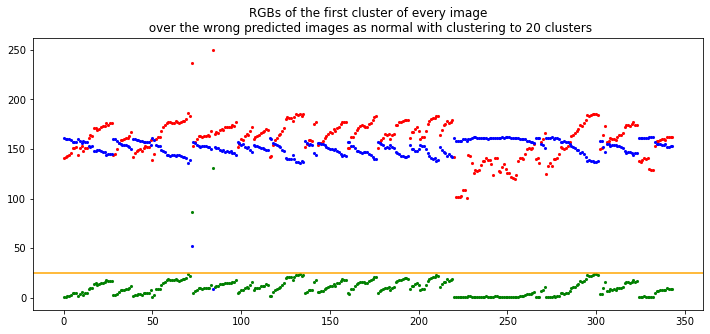

In [133]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)
clusters_red   = np.asarray(clusters_red  )
clusters_green = np.asarray(clusters_green)
clusters_blue  = np.asarray(clusters_blue )
x = range(len(clusters_red))

ax.set_title("RGBs of the first cluster of every image\n over the wrong predicted images as normal with clustering to 20 clusters")
ax.scatter(x, clusters_red, marker='.',  linewidths=0.1, color = 'r')
ax.scatter(x, clusters_green, marker='.',  linewidths=0.1, color = 'g')
ax.scatter(x, clusters_blue, marker='.',  linewidths=0.1,  color = 'b')
ax.axhline(y = 25, color = 'orange', linestyle = '-')
plt.show()

In [172]:
path = glob.glob("D:/5FH/ML/images/clean-fail-clustered-centers-20/*.npy")
clusters_fail_red   = []
clusters_fail_green = []
clusters_fail_blue  = []
red_blue_difference = []
for file in tqdm(path):
    X = np.load(file)
    means = np.mean(X, axis=1)
    sorted_means = np.sort(means)
    sorted_clusters = []
    for i in range(0,20):
        for j in range(0,20):
            if sorted_means[i] == means[j]:
                sorted_clusters.append(X[j])
                break
    clusters_fail_red.append(sorted_clusters[0][0])
    clusters_fail_green.append(sorted_clusters[0][1])
    clusters_fail_blue.append(sorted_clusters[0][2])
    red_blue_difference.append(abs(sorted_clusters[0][0] - sorted_clusters[0][2]))
    

100%|█████████████████████████████████████████████████████████████████████████████| 6191/6191 [00:37<00:00, 164.34it/s]


In [164]:
clusters_fail_green = np.asarray(clusters_fail_green)
cc = red_blue_difference[ red_blue_difference > 100]
dd = clusters_fail_green[ red_blue_difference > 100]


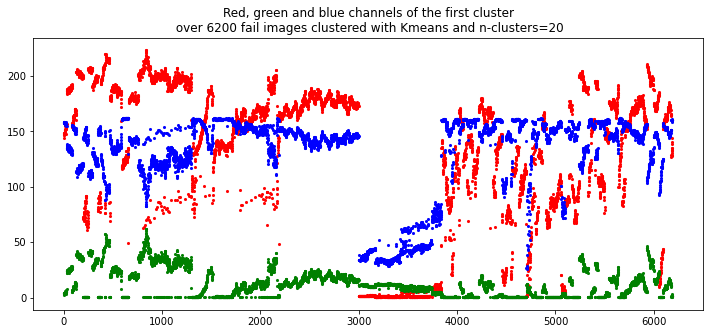

In [173]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)
clusters_fail_red = np.asarray(clusters_fail_red)
clusters_fail_green = np.asarray(clusters_fail_green)
clusters_fail_blue = np.asarray(clusters_fail_blue)

x = range(len(clusters_fail_red))
y = clusters_fail_red
ax.set_title("Red, green and blue channels of the first cluster\n over 6200 fail images clustered with Kmeans and n-clusters=20")
ax.scatter(x, y, marker='.',  linewidths=0.1, color = 'r')
y = clusters_fail_green
ax.scatter(x, y, marker='.',  linewidths=0.1, color='g')
y = clusters_fail_blue
ax.scatter(x, y, marker='.',  linewidths=0.1, color = 'b')

# ax.axhline(y = 2600, color = 'r', linestyle = '-')
plt.show()

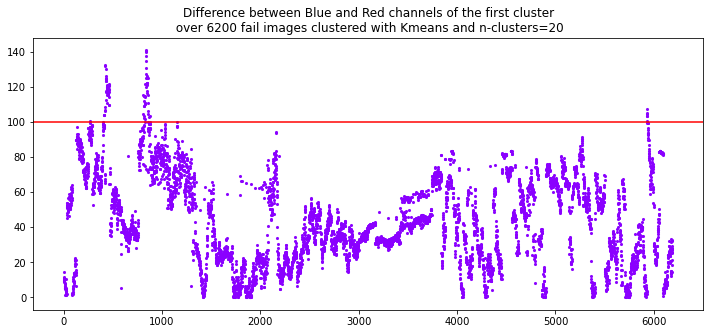

In [170]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)
red_blue_difference = np.asarray(red_blue_difference)

x = range(len(red_blue_difference))
y = red_blue_difference
ax.set_title("Difference between Blue and Red channels of the first cluster\n over 6200 fail images clustered with Kmeans and n-clusters=20")
ax.scatter(x, red_blue_difference, marker='.',  linewidths=0.1, color = '#8a00ff')
# ax.scatter(x, dd, marker='.',  linewidths=0.1, color = 'g')

ax.axhline(y = 100, color = 'r', linestyle = '-')
plt.show()

In [167]:
print(dd)

[43.17889908 43.09881423 44.72058824 44.74404762 44.85227273 45.51094891
 46.96089385 46.02941176 57.03797468 57.27739726 53.46892655 53.57560976
 56.39130435 54.4954955  53.55871886 52.97165992 52.80811808 50.22794118
 50.09225092 47.92215569 50.96466431 51.34146341 51.44599303 51.75838926
 52.19178082 51.52484472 47.29752066 51.04984424 49.26160338 50.05932203
 50.67431193 51.50340136 49.81304348 49.61151079 50.25757576 49.52488688
 51.42164179 52.16612378 50.59770115 51.75769231 52.14963504 51.81932773
 50.09459459 51.04017857 51.57028112 51.9122807  46.47959184 46.86021505
 49.01675978 50.7293578  44.7983871  49.99421965 43.9375     46.70833333
 49.75510204 50.13333333 48.69014085 46.71111111 44.05172414 46.67924528
 48.37068966 47.16071429 43.2295082  47.3625     47.93650794 49.74545455
 53.18965517 52.81818182 54.44262295 55.4375     61.94350282 60.46666667
 62.05555556 62.02197802 58.60674157 57.09195402 54.75641026 55.15853659
 50.07462687 52.32820513 53.83732057 52.51515152 50

In [158]:
path = glob.glob("D:/5FH/ML/images/clean-normal-clustered-centers-20/test/*.npy")
clusters_red   = []
clusters_green = []
clusters_blue  = []
differnce_red_blue = []
for file in tqdm(path):
    X = np.load(file)
    means = np.mean(X, axis=1)
    sorted_means = np.sort(means)
    sorted_clusters = []
    for i in range(0,20):
        for j in range(0,20):
            if sorted_means[i] == means[j]:
                sorted_clusters.append(X[j])
                break
    clusters_red.append(sorted_clusters[0][0])  
    clusters_green.append(sorted_clusters[0][1])
    clusters_blue.append(sorted_clusters[0][2])
    differnce_red_blue.append(abs(sorted_clusters[0][0])- sorted_clusters[0][2])
clusters_red   = np.asarray(clusters_red  )
clusters_green = np.asarray(clusters_green)
clusters_blue  = np.asarray(clusters_blue )

100%|███████████████████████████████████████████████████████████████████████████| 13907/13907 [00:19<00:00, 701.97it/s]


In [166]:
print(len (differnce_red_blue [differnce_red_blue < 100 ]))

338


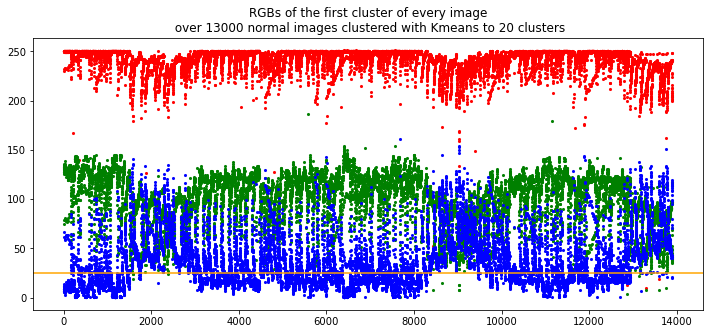

In [128]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)
clusters_red   = np.asarray(clusters_red  )
clusters_green = np.asarray(clusters_green)
clusters_blue  = np.asarray(clusters_blue )
x = range(len(clusters_red))

ax.set_title("RGBs of the first cluster of every image\n over 13000 normal images clustered with Kmeans to 20 clusters")
ax.scatter(x, clusters_red, marker='.',  linewidths=0.1, color = 'r')
ax.scatter(x, clusters_green, marker='.',  linewidths=0.1, color = 'g')
ax.scatter(x, clusters_blue, marker='.',  linewidths=0.1,  color = 'b')
ax.axhline(y = 25, color = 'orange', linestyle = '-')
plt.show()

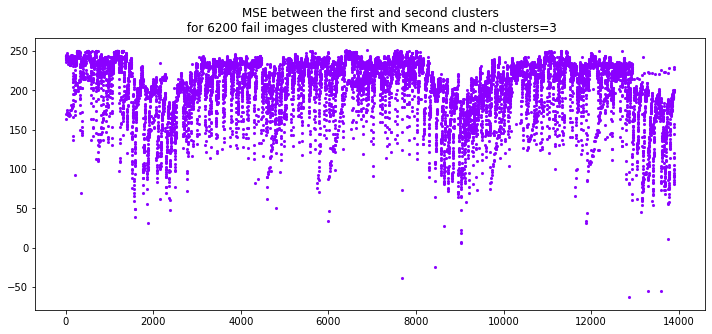

In [159]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)
differnce_red_blue = np.asarray(differnce_red_blue)

x = range(len(differnce_red_blue))
y = differnce_red_blue
ax.set_title("MSE between the first and second clusters\n for 6200 fail images clustered with Kmeans and n-clusters=3")
ax.scatter(x, y, marker='.',  linewidths=0.1, color = '#8a00ff')

# ax.axhline(y = 2600, color = 'r', linestyle = '-')
plt.show()